LOAD THE LIBRARIES


In [2]:
#load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for working with arrays

#import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# MOUTING TO GOOGLE DRIVE

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
# load dataset

url="/content/JMG_data (3).csv"

US_Car_Dealership_Market_Data = pd.read_csv(url)

#Inspect the dataset
print(US_Car_Dealership_Market_Data.head(5)) #for simplification
print()
print()


# Dataset summary with a used-car market perspective
print(f"This dataset features {US_Car_Dealership_Market_Data.shape[0]:,} used car listings across {US_Car_Dealership_Market_Data.shape[1]} attributes, "
      f"uncovering trends in pricing, demand, and vehicle conditions. ")

     CarID  Listed_Price               Listed_Date       Make           Model  \
0  1246014         13987  2021-04-24T09:23:15-0500  chevrolet  silverado 1500   
1   692370          2800  2021-04-15T22:07:43-0400     toyota         4runner   
2   242958          1750  2021-05-02T13:02:12-0600       ford  escape xlt awd   
3   310455          9200  2021-04-12T12:20:38-0400      dodge         journey   
4   800040          9900  2021-04-30T13:36:13-0400     toyota        rav4 awd   

   Year Vehicle_Type       Size   Color Transmission Fuel_Type Drive  \
0  2007        truck   mid-size     red    automatic       gas   rwd   
1  1999          SUV  full-size  silver    automatic       gas   rwd   
2  2003          SUV   mid-size    grey    automatic       gas   4wd   
3  2015          SUV  full-size   white    automatic       gas   fwd   
4  2010          SUV   mid-size    grey    automatic       gas   4wd   

   Cylinders  Odometer  Condition Title_Status State                Region  
0  

# Dataset information

In [44]:
print(f"The dataset provides a structured overview of used car listings, with 'Listed_price' as the dominant attribute.\n"
      "It includes key details such as:\n"
      f"{chr(10).join(US_Car_Dealership_Market_Data.columns[0:])}\n")

US_Car_Dealership_Market_Data.info()

The dataset provides a structured overview of used car listings, with 'Listed_price' as the dominant attribute.
It includes key details such as:
CarID
Listed_Price
Listed_Date
Make
Model
Year
Vehicle_Type
Size
Color
Transmission
Fuel_Type
Drive
Cylinders
Odometer
Condition
Title_Status
State
Region

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62946 entries, 0 to 62945
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CarID         62946 non-null  int64  
 1   Listed_Price  62946 non-null  int64  
 2   Listed_Date   62946 non-null  object 
 3   Make          62946 non-null  object 
 4   Model         62946 non-null  object 
 5   Year          62946 non-null  int64  
 6   Vehicle_Type  62946 non-null  object 
 7   Size          62946 non-null  object 
 8   Color         62946 non-null  object 
 9   Transmission  62946 non-null  object 
 10  Fuel_Type     62946 non-null  object 
 11  Drive         62946 non-nu

In [45]:
US_Car_Dealership_Market_Data.drop(columns=['CarID'], inplace=True)

# Check if the column was successfully removed
print(US_Car_Dealership_Market_Data.columns)

Index(['Listed_Price', 'Listed_Date', 'Make', 'Model', 'Year', 'Vehicle_Type',
       'Size', 'Color', 'Transmission', 'Fuel_Type', 'Drive', 'Cylinders',
       'Odometer', 'Condition', 'Title_Status', 'State', 'Region'],
      dtype='object')


#Counting Null values for every feature


In [46]:
# Count null values in each column
null_values = US_Car_Dealership_Market_Data.isnull().sum()

# Print the message for each column
for column, count in null_values.items():
    if count > 0:
        print(f"⚠️ The column '{column}' contains {count} null values, indicating missing or incomplete data that may need to be addressed during data cleaning.")
    else:
        print(f"✅ The column '{column}' has no missing data, ensuring complete information for analysis.")


✅ The column 'Listed_Price' has no missing data, ensuring complete information for analysis.
✅ The column 'Listed_Date' has no missing data, ensuring complete information for analysis.
✅ The column 'Make' has no missing data, ensuring complete information for analysis.
✅ The column 'Model' has no missing data, ensuring complete information for analysis.
✅ The column 'Year' has no missing data, ensuring complete information for analysis.
✅ The column 'Vehicle_Type' has no missing data, ensuring complete information for analysis.
✅ The column 'Size' has no missing data, ensuring complete information for analysis.
✅ The column 'Color' has no missing data, ensuring complete information for analysis.
✅ The column 'Transmission' has no missing data, ensuring complete information for analysis.
✅ The column 'Fuel_Type' has no missing data, ensuring complete information for analysis.
✅ The column 'Drive' has no missing data, ensuring complete information for analysis.
⚠️ The column 'Cylinders' 

# TASK-1 Sumarizing key attributes




Overview of the listed Car

Univariate Analysis
1.Make
2.Odomter
3.Year
4.Vehicle_Type
5.Size
6.Condition
7.Price


In [47]:
# Summarizing 'Make' or Manufacturer column (Categorical column)
column = US_Car_Dealership_Market_Data['Make']

summary = column.describe()

print("="*60)
print("INSIGHTS FROM MAKE (BRAND) COLUMN")
print("="*60)

print(f"Total cars listed with brand information: {summary['count']}")

print(f"Number of unique car brands available: {summary['unique']}")

print(f"The most frequently listed car brand is: {summary['top']}")

print(f"Number of cars listed for {summary['top']}: {summary['freq']}")
US_Car_Dealership_Market_Data['Make'].describe()


INSIGHTS FROM MAKE (BRAND) COLUMN
Total cars listed with brand information: 62946
Number of unique car brands available: 40
The most frequently listed car brand is: ford
Number of cars listed for ford: 12412


,Make
count,62946
unique,40
top,ford
freq,12412


<ipython-input-48-beb14001e8e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, palette='viridis', order=column.value_counts().index)


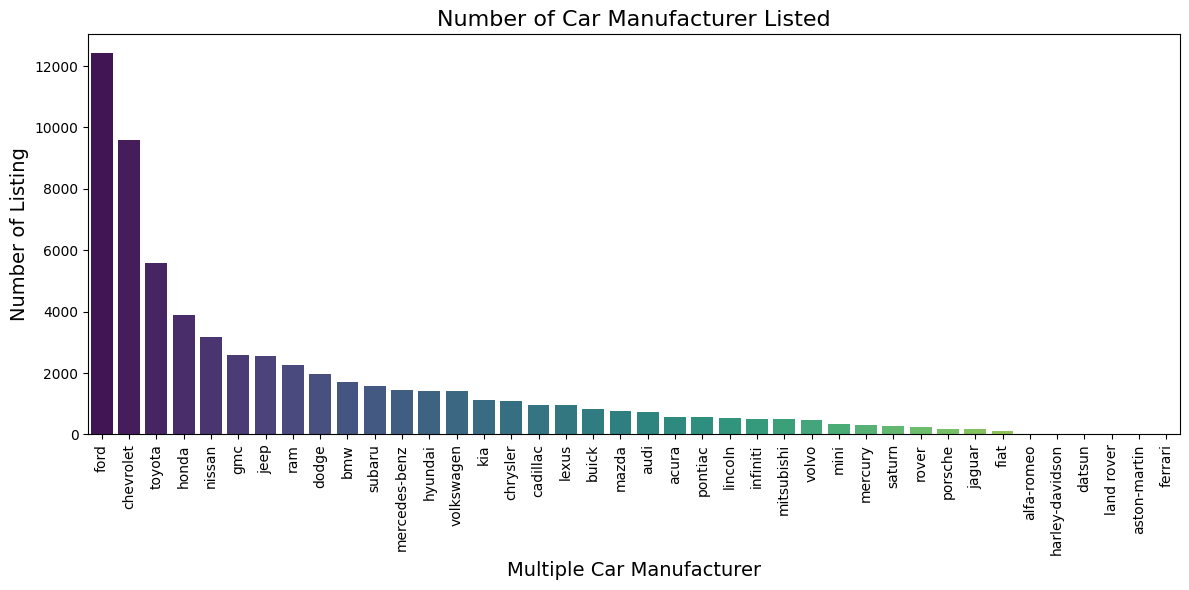

In [48]:
# Plotting the countplot for the 'Make' column
plt.figure(figsize=(12, 6))
sns.countplot(x=column, palette='viridis', order=column.value_counts().index)

# Add titles and labels
plt.title('Number of Car Manufacturer Listed', fontsize=16)
plt.xlabel('Multiple Car Manufacturer', fontsize=14)
plt.ylabel('Number of Listing', fontsize=14)
plt.xticks(rotation=90)  # Rotate brand names for better readability

# Display the plot
plt.tight_layout()
plt.show()


In [49]:
# Summarizing 'Vehicle_Type' column (Categorical column)
column = US_Car_Dealership_Market_Data['Vehicle_Type']

summary = column.describe()

print("="*60)
print("INSIGHTS FROM VEHICLE TYPE COLUMN")
print("="*60)

print(f"Total cars listed with vehicle type information: {summary['count']}")

print(f"Number of unique vehicle types available: {summary['unique']}")

print(f"The most frequently listed vehicle type is: {summary['top']}")

print(f"Number of cars listed as {summary['top']}: {summary['freq']}")

US_Car_Dealership_Market_Data['Vehicle_Type'].describe()



INSIGHTS FROM VEHICLE TYPE COLUMN
Total cars listed with vehicle type information: 62946
Number of unique vehicle types available: 13
The most frequently listed vehicle type is: sedan
Number of cars listed as sedan: 17345


,Vehicle_Type
count,62946
unique,13
top,sedan
freq,17345


<ipython-input-50-8735099bf2ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=US_Car_Dealership_Market_Data, x='Vehicle_Type', palette='viridis')


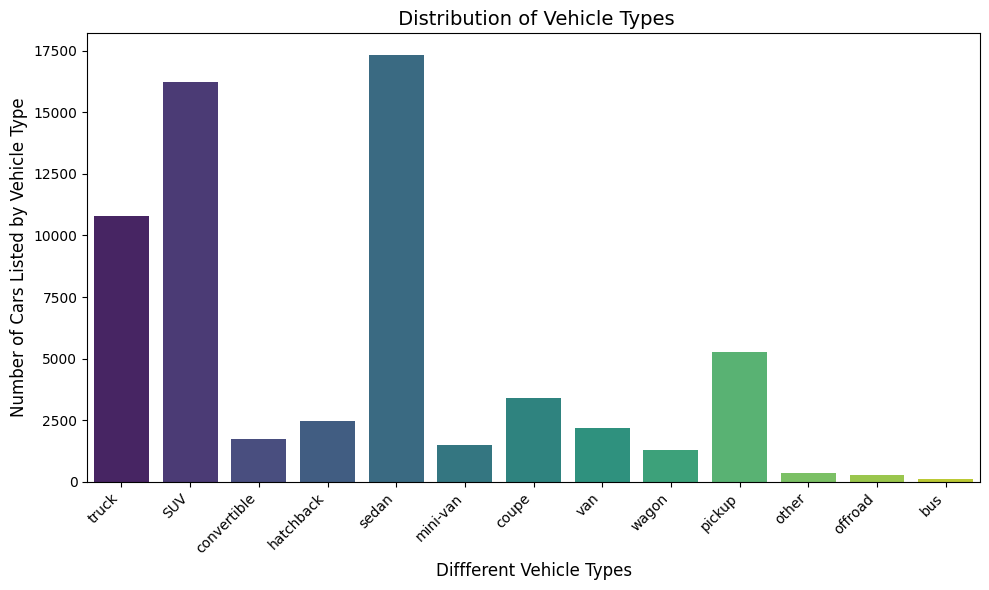

In [50]:
 #Plotting the frequency distribution of 'Vehicle_Type'
plt.figure(figsize=(10, 6))
sns.countplot(data=US_Car_Dealership_Market_Data, x='Vehicle_Type', palette='viridis')

# Adding titles and labels
plt.title(' Distribution of Vehicle Types', fontsize=14)
plt.xlabel('Diffferent Vehicle Types', fontsize=12)
plt.ylabel('Number of Cars Listed by Vehicle Type', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()



In [51]:
# Summarizing 'Odometer' column (Numerical column)
column = US_Car_Dealership_Market_Data['Odometer']

# Check if the column is numerical
mode = column.mode()[0]  # Get the mode (most frequent value)
summary = column.describe()

print("="*60)
print("INSIGHTS FROM ODOMETER READING COLUMN")
print("="*60)

# Descriptive Summary for 'Odometer'
print(f"  {summary['max']} miles is the  **Highest Mileage**.   a car can be driven:")
print(f"  {summary['min']} miles is the  **lowest Mileage**.   a car can be driven:")
print(f"  {summary['mean']} miles is the  **Average Mileage**   a car can be driven:")
print(f"  {column.median()} miles is the  **Median Mileage** ,  representing the typical mileage of the cars.")
print(f"  {mode} miles is the   **Most Frequently Listed Mileage**  among all the cars.")
print(f"  From {summary['25%']} miles to {summary['75%']} miles is the   **Range**  within which most of the cars fall.")
print(f"  {summary['std']} miles is the   **Variation**  in Mileage, reflecting how much car mileages vary.")
print(f"  {summary['count']} cars are listed with varying mileage values.")
US_Car_Dealership_Market_Data['Odometer'].describe()



INSIGHTS FROM ODOMETER READING COLUMN
  10000000.0 miles is the  **Highest Mileage**.   a car can be driven:
  0.0 miles is the  **lowest Mileage**.   a car can be driven:
  125021.33484256346 miles is the  **Average Mileage**   a car can be driven:
  114917.0 miles is the  **Median Mileage** ,  representing the typical mileage of the cars.
  200000 miles is the   **Most Frequently Listed Mileage**  among all the cars.
  From 74042.5 miles to 156000.0 miles is the   **Range**  within which most of the cars fall.
  242481.18592632085 miles is the   **Variation**  in Mileage, reflecting how much car mileages vary.
  62946.0 cars are listed with varying mileage values.


,Odometer
count,6.294600e+04
mean,1.250213e+05
std,2.424812e+05
min,0.000000e+00
25%,7.404250e+04
50%,1.149170e+05
75%,1.560000e+05
max,1.000000e+07


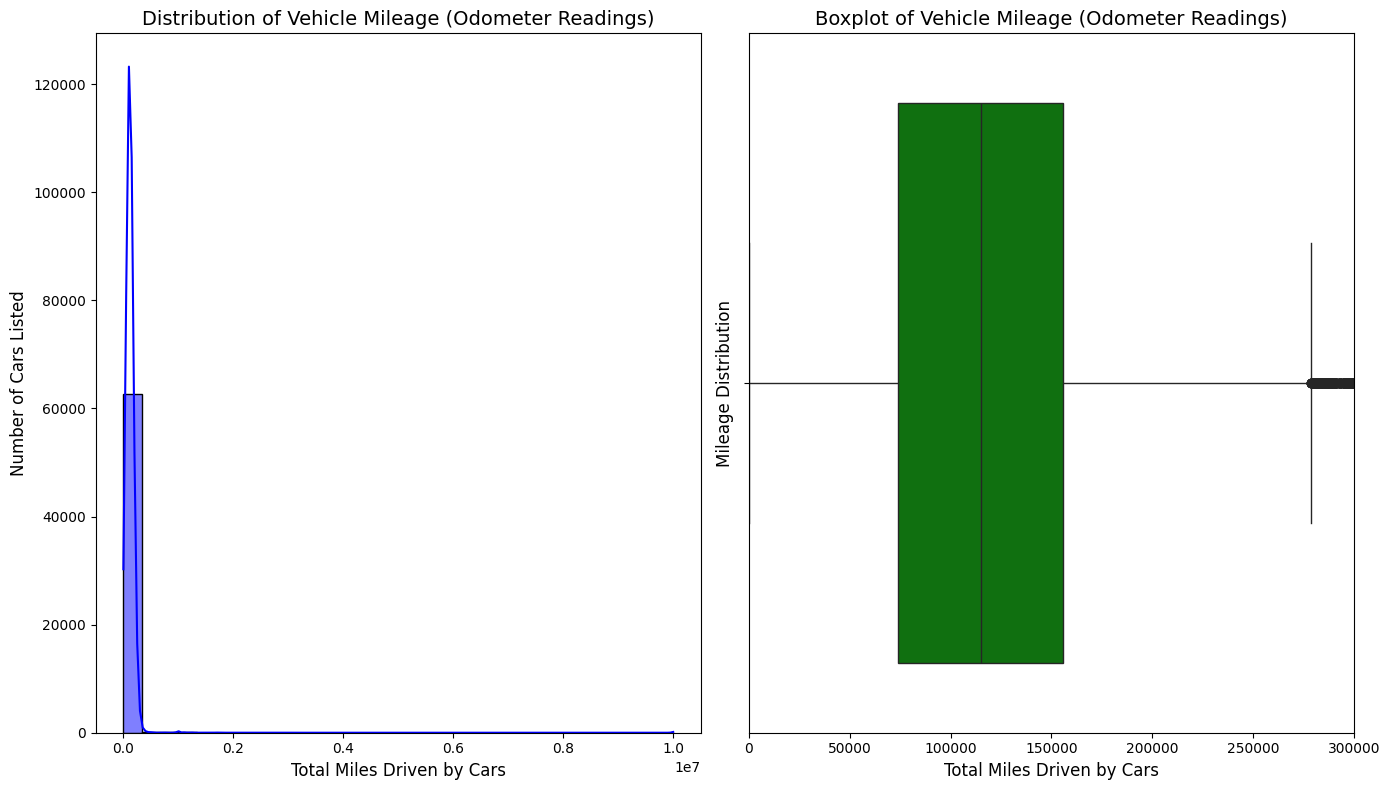

In [52]:
# Plotting a histplot to show the distribution of 'Odometer' values
plt.figure(figsize=(14, 8))  # Increased figure size for better visibility

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(US_Car_Dealership_Market_Data['Odometer'], kde=True, color='blue', bins=30)
plt.title('Distribution of Vehicle Mileage (Odometer Readings)', fontsize=14)
plt.xlabel('Total Miles Driven by Cars', fontsize=12)
plt.ylabel('Number of Cars Listed', fontsize=12)


# Plotting a boxplot to show the range, median, and outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=US_Car_Dealership_Market_Data['Odometer'], color='green')
plt.title('Boxplot of Vehicle Mileage (Odometer Readings)', fontsize=14)
plt.xlabel('Total Miles Driven by Cars', fontsize=12)
plt.ylabel('Mileage Distribution', fontsize=12)

# Adjust x-axis range if necessary
plt.xlim(0, 300000)  # Adjust this based on the actual range of your data

# Display the plots
plt.tight_layout()
plt.show()


In [53]:
# Summarizing 'Year' column (Numerical column)
column = US_Car_Dealership_Market_Data['Year']

mode = column.mode()[0]
summary = column.describe()

print("="*60)
print("INSIGHTS FROM BUILD YEAR COLUMN")
print("="*60)

print(f"The newest car in the dataset was built in: {int(summary['max'])}")

print(f"The oldest car in the dataset was built in: {int(summary['min'])}")

print(f"The average build year of cars is: {round(summary['mean'], 0)}")

print(f"The median build year is: {int(column.median())}")

print(f"The most frequently listed build year is: {int(mode)}")

print(f"Most cars were built between {int(summary['25%'])} and {int(summary['75%'])}")

print(f"There are {int(summary['count'])} cars with recorded build year information.")
US_Car_Dealership_Market_Data['Year'].describe()



INSIGHTS FROM BUILD YEAR COLUMN
The newest car in the dataset was built in: 2022
The oldest car in the dataset was built in: 1900
The average build year of cars is: 2008.0
The median build year is: 2011
The most frequently listed build year is: 2013
Most cars were built between 2006 and 2014
There are 62946 cars with recorded build year information.


,Year
count,62946.000000
mean,2008.470642
std,9.892727
min,1900.000000
25%,2006.000000
50%,2011.000000
75%,2014.000000
max,2022.000000


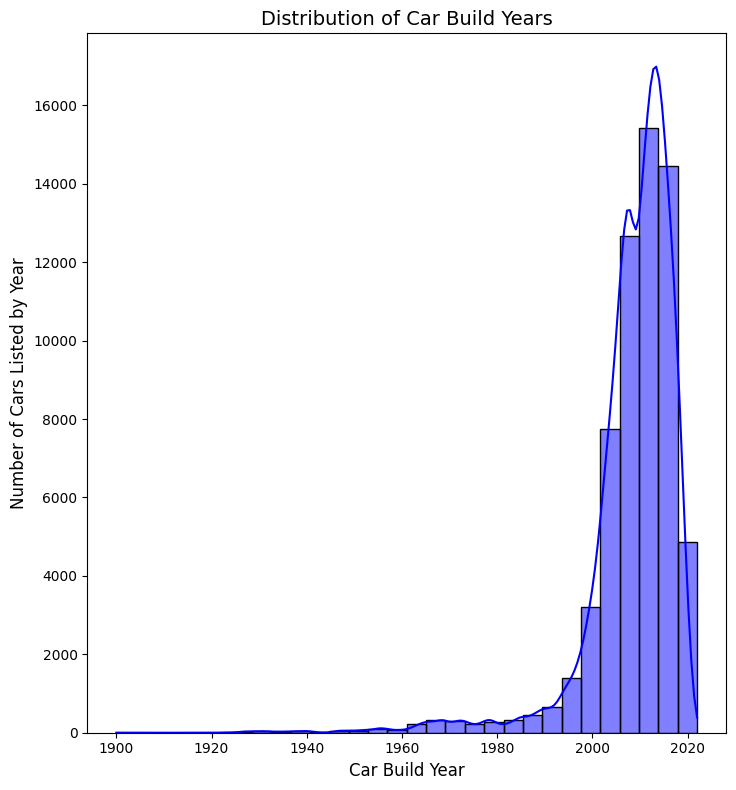

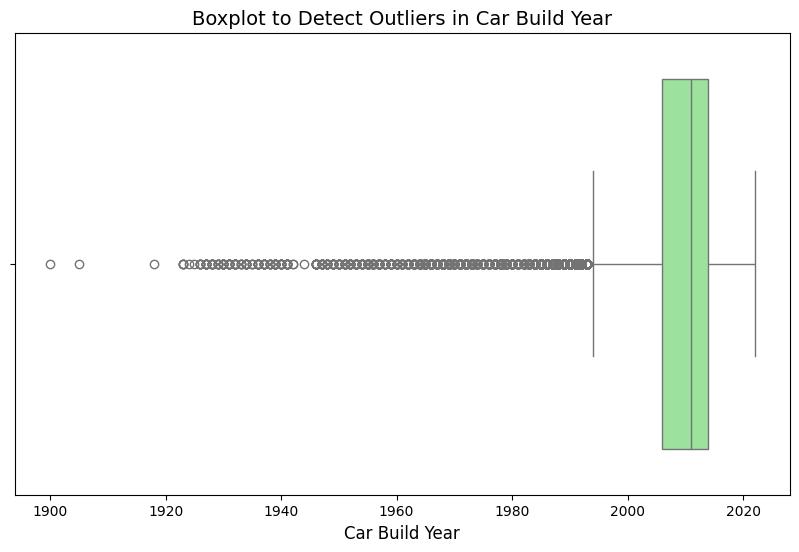

In [54]:
# Plotting a histplot to show the distribution of 'Build year' values
plt.figure(figsize=(14, 8))  # Increased figure size

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(US_Car_Dealership_Market_Data['Year'], kde=True, color='blue', bins=30)
plt.title('Distribution of Car Build Years', fontsize=14)
plt.xlabel('Car Build Year', fontsize=12)
plt.ylabel('Number of Cars Listed by Year', fontsize=12)  # Updated y-axis label
plt.tight_layout()
plt.show()
print()
#BOXPLOT FOR OUTLIERS

plt.figure(figsize=(10, 6))  # Set figure size

sns.boxplot(x=US_Car_Dealership_Market_Data['Year'], color='lightgreen')

plt.title('Boxplot to Detect Outliers in Car Build Year', fontsize=14)
plt.xlabel('Car Build Year', fontsize=12)

plt.show()


<ipython-input-85-08826496014b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=US_Car_Dealership_Market_Data, x='Size', palette='Purples')


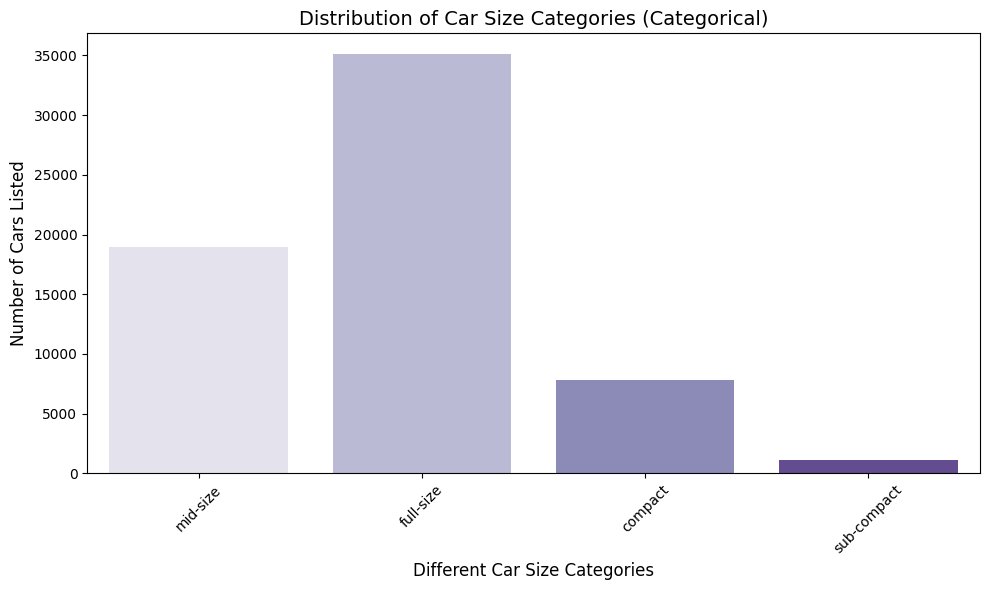

In [85]:
plt.figure(figsize=(10, 6))  # Adjusted size for countplot

# Countplot for car size
sns.countplot(data=US_Car_Dealership_Market_Data, x='Size', palette='Purples')

plt.title('Distribution of Car Size Categories (Categorical)', fontsize=14)
plt.xlabel('Different Car Size Categories', fontsize=12)
plt.ylabel('Number of Cars Listed', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-86-7ed4a2f25e7e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=US_Car_Dealership_Market_Data, x='Condition', palette='Oranges')


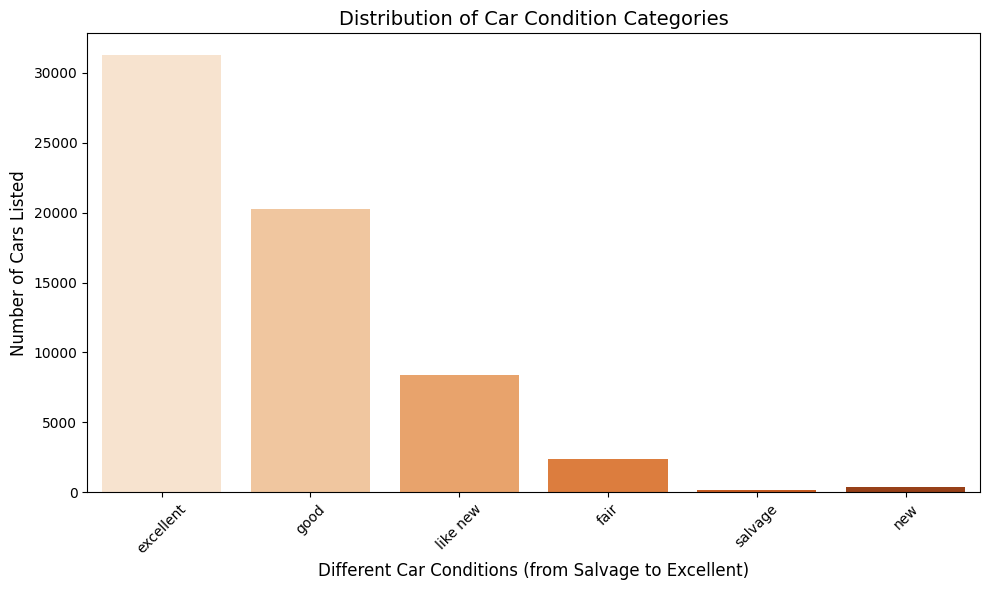

In [86]:
# Plotting the distribution of 'Condition' using Countplot
plt.figure(figsize=(10, 6))  # Adjusted size for countplot

sns.countplot(data=US_Car_Dealership_Market_Data, x='Condition', palette='Oranges')

plt.title('Distribution of Car Condition Categories', fontsize=14)
plt.xlabel('Different Car Conditions (from Salvage to Excellent)', fontsize=12)
plt.ylabel('Number of Cars Listed', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [57]:
# Filter out rows where Listed_Price > 0
column = US_Car_Dealership_Market_Data[US_Car_Dealership_Market_Data['Listed_Price'] > 0]['Listed_Price']

# Calculate Mode & Summary
mode = column.mode()[0]
summary = column.describe()

print("Price Summary (For Listed Price > 0 Only):\n")

print(f"Average listed price of car is ${round(summary['mean'], 0)}.")
print(f"Highest price listed among cars is ${int(summary['max'])}.")
print(f"Most cars are priced between ${int(summary['25%'])} and ${int(summary['75%'])}.")
print(f"Median price of a car is ${int(column.median())}.")
print(f"Most common price listed is ${int(mode)}.")
print(f"Total cars listed with price data: {int(summary['count'])}.")


Price Summary (For Listed Price > 0 Only):

Average listed price of car is $13569.0.
Highest price listed among cars is $75000.
Most cars are priced between $5500 and $17995.
Median price of a car is $9850.
Most common price listed is $3500.
Total cars listed with price data: 60175.


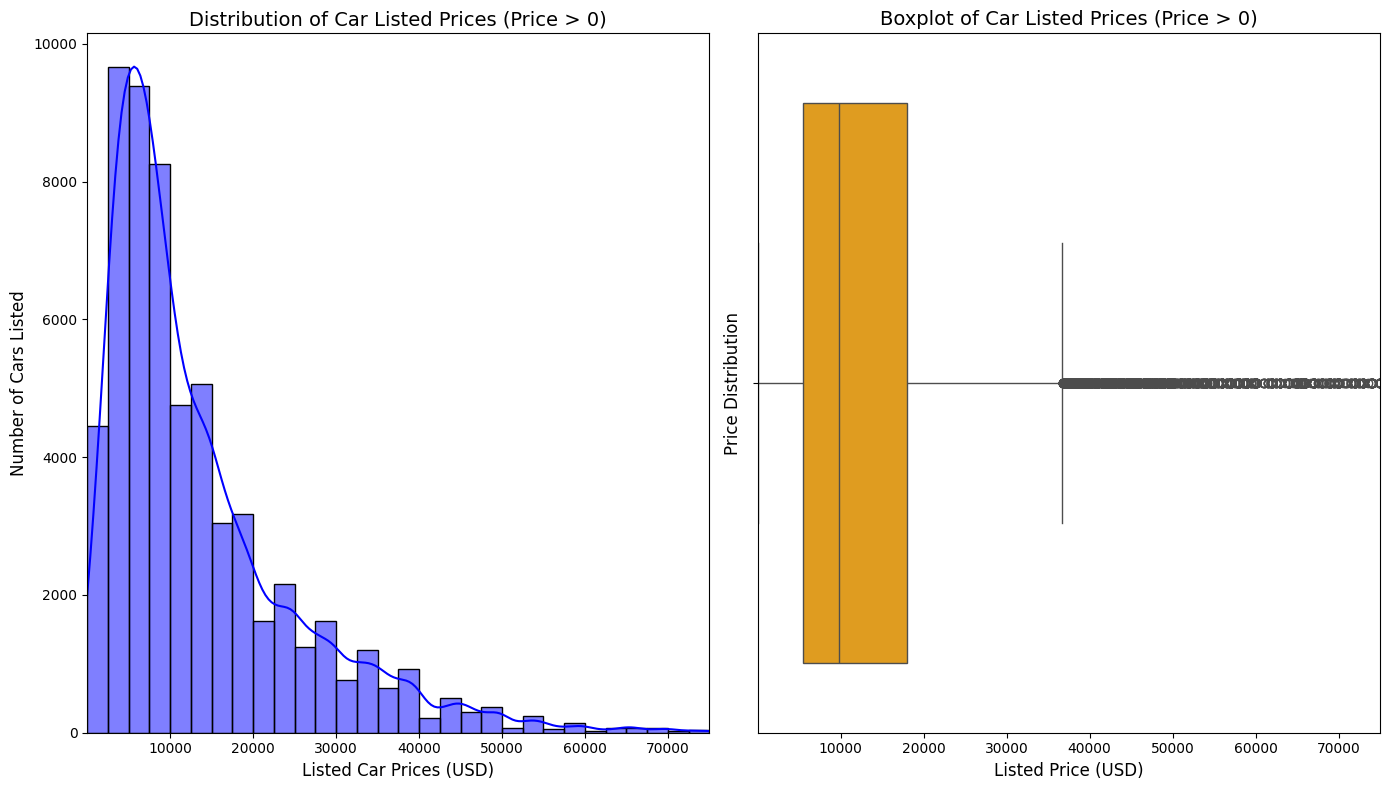

In [58]:
# Filter for Listed_Price > 0
filtered_data = US_Car_Dealership_Market_Data[US_Car_Dealership_Market_Data['Listed_Price'] > 0]

plt.figure(figsize=(14, 8))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(filtered_data['Listed_Price'], kde=True, color='blue', bins=30)
plt.xlim(filtered_data['Listed_Price'].min(), filtered_data['Listed_Price'].max())
plt.title('Distribution of Car Listed Prices (Price > 0)', fontsize=14)
plt.xlabel('Listed Car Prices (USD)', fontsize=12)
plt.ylabel('Number of Cars Listed', fontsize=12)

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_data['Listed_Price'], color='orange')
plt.xlim(filtered_data['Listed_Price'].min(), filtered_data['Listed_Price'].max())
plt.title('Boxplot of Car Listed Prices (Price > 0)', fontsize=14)
plt.xlabel('Listed Price (USD)', fontsize=12)
plt.ylabel('Price Distribution', fontsize=12)

plt.tight_layout()
plt.show()


# TASK-2 Car Popularity by make and model


Bivariate Analysis of Make and Model
Creating Cross Table

In [59]:
#TASK 2 BIVARIET

# Step 1: Create a cross table for 'make' and 'model'

cross_table = pd.crosstab(US_Car_Dealership_Market_Data['Make'], US_Car_Dealership_Market_Data['Model'])

flattened = cross_table.stack().reset_index(name='count')

# Step 3: Sort the flattened table by the 'count' column in descending order
sorted_flattened = flattened.sort_values(by='count', ascending=False)

# Step 4: Get the top 10 most frequent combinations
top_10 = sorted_flattened.head(10)

# Display the result
print("Top 10 most listed Manufacture's model in the US Market: ")
print()
print(top_10)
print(f"Datatype:{US_Car_Dealership_Market_Data['Make'].dtype}")









Top 10 most listed Manufacture's model in the US Market: 

             Make           Model  count
112769       ford           f-150   1307
65714   chevrolet  silverado 1500   1151
277900        ram            1500    690
313306     toyota           camry    534
65712   chevrolet       silverado    533
135749      honda          accord    517
136732      honda           civic    458
176454       jeep        wrangler    426
278078        ram            2500    425
253746     nissan          altima    397
Datatype:object


<ipython-input-60-d3736c905d04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y=top_10['Make'] + ' ' + top_10['Model'], data=top_10, palette='viridis')


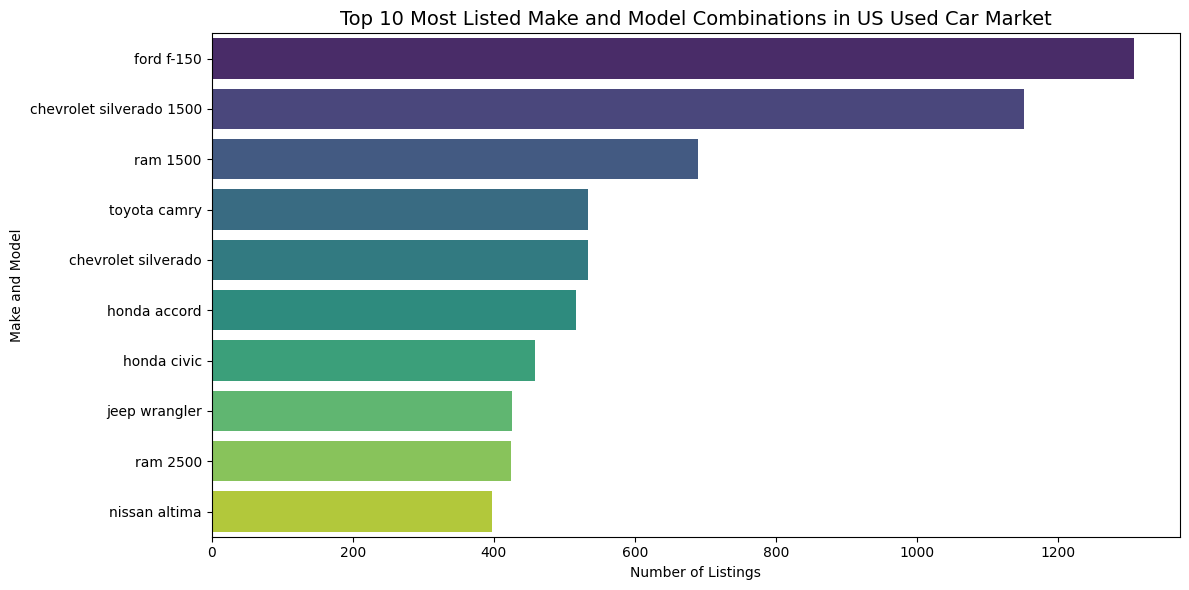

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(x='count', y=top_10['Make'] + ' ' + top_10['Model'], data=top_10, palette='viridis')
plt.title('Top 10 Most Listed Make and Model Combinations in US Used Car Market', fontsize=14)
plt.xlabel('Number of Listings')
plt.ylabel('Make and Model')
plt.tight_layout()
plt.show()

# TASK-3 Analysing Car Price by Odometer and Age


Bivariate Analysis 1.Listed_Price vs Odometer
2.Listed_Price vs Age

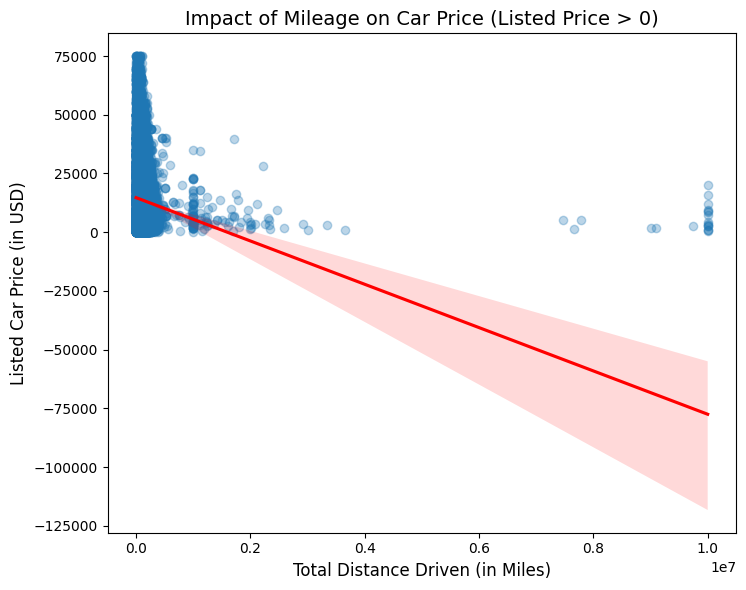

In [61]:
plt.figure(figsize=(14, 6))

# Price vs Odometer with Regression Line for Price > 0
plt.subplot(1, 2, 1)
sns.regplot(
    x='Odometer',
    y='Listed_Price',
    data=filtered_data,
    scatter_kws={'alpha':0.3},
    line_kws={"color":"red"}
)

plt.title('Impact of Mileage on Car Price (Listed Price > 0)', fontsize=14)
plt.xlabel('Total Distance Driven (in Miles)', fontsize=12)
plt.ylabel('Listed Car Price (in USD)', fontsize=12)

plt.tight_layout()
plt.show()


In [62]:
US_Car_Dealership_Market_Data['Listed_Date'] = pd.to_datetime(US_Car_Dealership_Market_Data['Listed_Date'], errors='coerce', utc=True)

# Calculated Car Age
US_Car_Dealership_Market_Data['Age_Of_Car'] = US_Car_Dealership_Market_Data['Listed_Date'].dt.year - US_Car_Dealership_Market_Data['Year']

print(US_Car_Dealership_Market_Data['Listed_Date'].head())
print(US_Car_Dealership_Market_Data[['Listed_Date', 'Year', 'Age_Of_Car']].head())
print(US_Car_Dealership_Market_Data['Age_Of_Car'].dtype)

# Filter data where Listed_Price > 0
filtered_data = US_Car_Dealership_Market_Data[US_Car_Dealership_Market_Data['Listed_Price'] > 0]

0   2021-04-24 14:23:15+00:00
1   2021-04-16 02:07:43+00:00
2   2021-05-02 19:02:12+00:00
3   2021-04-12 16:20:38+00:00
4   2021-04-30 17:36:13+00:00
Name: Listed_Date, dtype: datetime64[ns, UTC]
                Listed_Date  Year  Age_Of_Car
0 2021-04-24 14:23:15+00:00  2007          14
1 2021-04-16 02:07:43+00:00  1999          22
2 2021-05-02 19:02:12+00:00  2003          18
3 2021-04-12 16:20:38+00:00  2015           6
4 2021-04-30 17:36:13+00:00  2010          11
int64


<ipython-input-63-1b65f09f2684>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Age_Group'] = pd.cut(filtered_data['Age_Of_Car'], bins=bins, labels=labels, right=False)


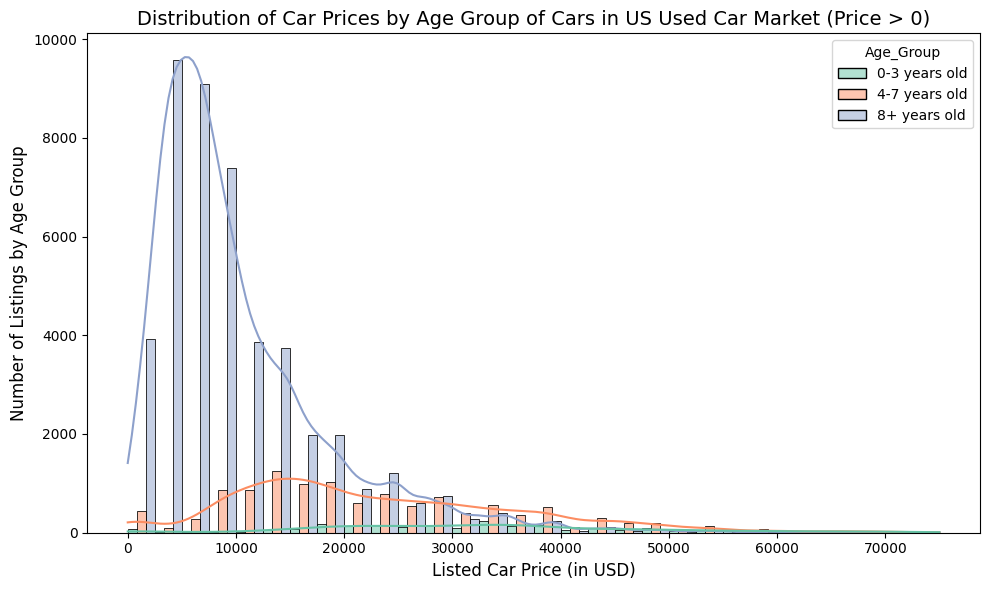

<ipython-input-63-1b65f09f2684>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Age_Group', y='Listed_Price', palette='Set2')


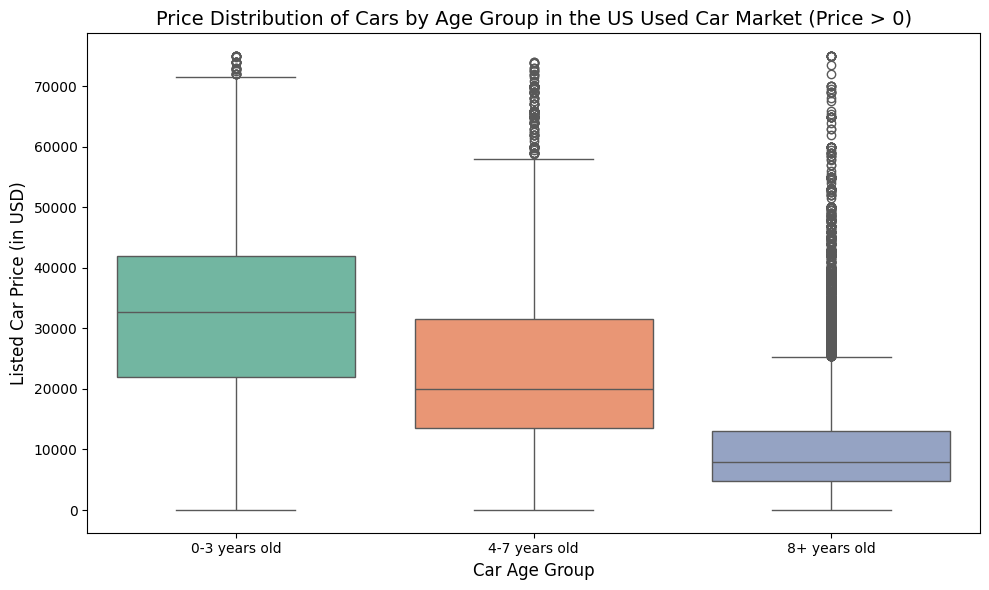

In [63]:
# Filter data where Listed_Price > 0
filtered_data = US_Car_Dealership_Market_Data[US_Car_Dealership_Market_Data['Listed_Price'] > 0]

# Age Categories
bins = [0, 3, 7, 100]  # Defining age bins
labels = ['0-3 years old', '4-7 years old', '8+ years old']  # Defining the corresponding age group labels

# Convert Age_Of_Car to Age Group using pd.cut
filtered_data['Age_Group'] = pd.cut(filtered_data['Age_Of_Car'], bins=bins, labels=labels, right=False)

# Histplot: Car Price Distribution by Age Group
plt.figure(figsize=(10, 6))

# Creating the histogram plot with 'dodge' for separate bars
sns.histplot(data=filtered_data, x='Listed_Price', hue='Age_Group', multiple='dodge', bins=30, palette='Set2', kde=True)

plt.title('Distribution of Car Prices by Age Group of Cars in US Used Car Market (Price > 0)', fontsize=14)
plt.xlabel('Listed Car Price (in USD)', fontsize=12)
plt.ylabel('Number of Listings by Age Group', fontsize=12)  # More specific y-axis label

# Display the plot
plt.tight_layout()
plt.show()

# Boxplot: Car Price Distribution by Age Group
plt.figure(figsize=(10, 6))

# Creating the boxplot
sns.boxplot(data=filtered_data, x='Age_Group', y='Listed_Price', palette='Set2')

# Adding the title and labels for the plot
plt.title('Price Distribution of Cars by Age Group in the US Used Car Market (Price > 0)', fontsize=14)
plt.xlabel('Car Age Group', fontsize=12)
plt.ylabel('Listed Car Price (in USD)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


# TASK-4 Analysing car price with selected feature

Bivariate Analysis
1.Listed_Price vs vehicle types,
2.Listed_Price vs sizes,
3.Listed_Price vs conditions,
4.Listed_Price vs fuel types.

<ipython-input-64-c661e0dcce3a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vehicle_Type', y='Listed_Price', data=filtered_data, palette='Set3')


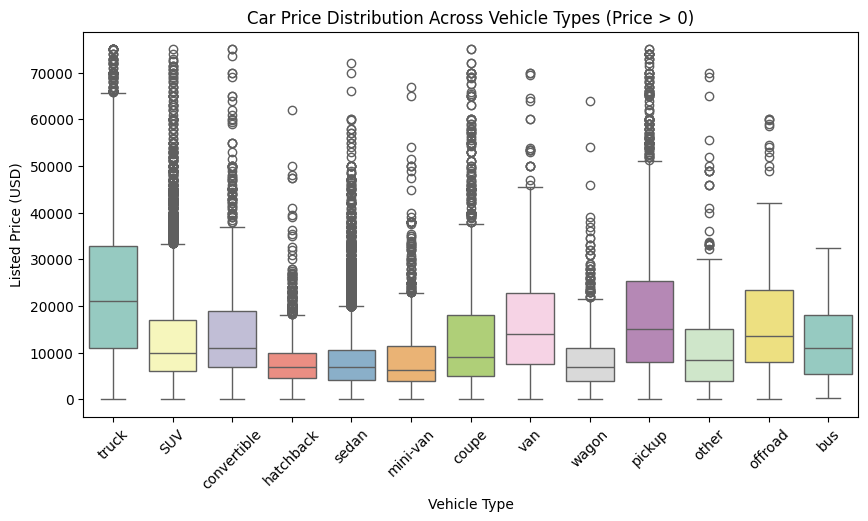

   Vehicle_Type  Total_Cars  Min_Price  Max_Price  Average_Price
0           SUV       15483          1      74988   12782.027772
1           bus          97        175      32500   12267.030928
2   convertible        1686          1      75000   14445.333926
3         coupe        3251          1      75000   13263.294679
4     hatchback        2411          1      62000    8148.506014
5      mini-van        1465          1      66990    9073.893515
6       offroad         257         13      60000   17414.373541
7         other         360          1      70000   11726.702778
8        pickup        5087          1      75000   18152.161785
9         sedan       16712          1      72000    8378.846757
10        truck       10034          1      75000   23099.625673
11          van        2096          1      70000   16165.367844
12        wagon        1236          1      64000    8336.653722


In [64]:
# Filter data where Listed_Price > 0
filtered_data = US_Car_Dealership_Market_Data[US_Car_Dealership_Market_Data['Listed_Price'] > 0]

# Boxplot: Car Price Distribution Across Vehicle Types
plt.figure(figsize=(10,5))
sns.boxplot(x='Vehicle_Type', y='Listed_Price', data=filtered_data, palette='Set3')
plt.title('Car Price Distribution Across Vehicle Types (Price > 0)')
plt.xlabel('Vehicle Type')
plt.ylabel('Listed Price (USD)')
plt.xticks(rotation=45)
plt.show()

# Grouping Vehicle Type with Price Statistics
vehicle_stats = filtered_data.groupby('Vehicle_Type')['Listed_Price'].agg(['count', 'min', 'max', 'mean']).reset_index()

# Renaming Columns for Better Clarity
vehicle_stats.columns = ['Vehicle_Type', 'Total_Cars', 'Min_Price', 'Max_Price', 'Average_Price']

# Display the vehicle stats
print(vehicle_stats)


          Size  Total_Cars  Min_Price  Max_Price  Average_Price
0      compact        7505          1      75000    9049.867022
1    full-size       33744          1      75000   16165.543919
2     mid-size       17899          1      75000   10791.873345
3  sub-compact        1027          1      70000    9704.807205


<ipython-input-65-5c3efc52b8bb>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Size', y='Listed_Price', palette='Set2')


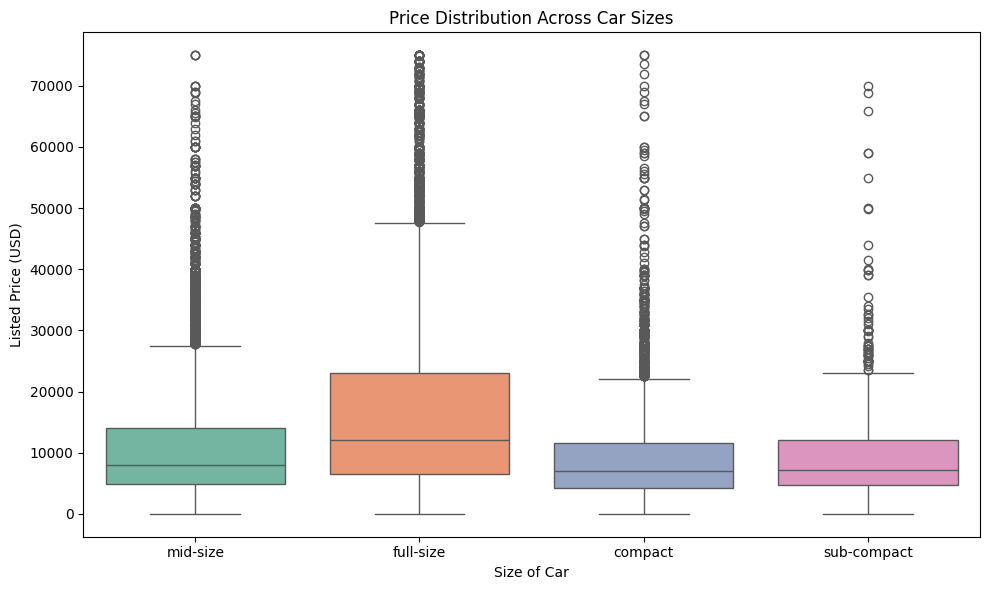

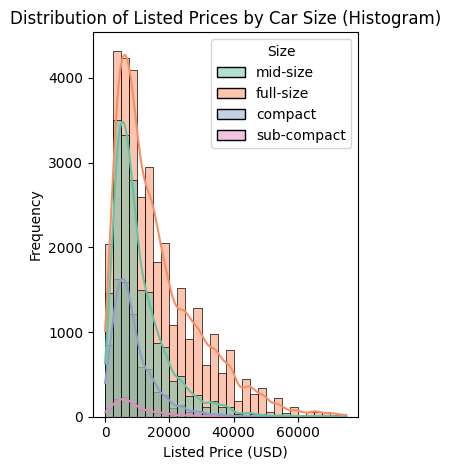

In [65]:
# Filter data where Listed_Price > 0
filtered_data = US_Car_Dealership_Market_Data[US_Car_Dealership_Market_Data['Listed_Price'] > 0]

# Grouping by Size and Calculating Statistics
size_price_stats = filtered_data.groupby('Size').agg(
    Total_Cars = ('Size', 'count'),         # Total cars for each size
    Min_Price = ('Listed_Price', 'min'),    # Minimum price
    Max_Price = ('Listed_Price', 'max'),    # Maximum price
    Average_Price = ('Listed_Price', 'mean') # Average price
).reset_index()

# Print the grouped statistics
print(size_price_stats)

# BOXPLOT for Size vs Listed Price Distribution
plt.figure(figsize=(10,6))

# Plotting the boxplot for car size vs listed price
sns.boxplot(data=filtered_data, x='Size', y='Listed_Price', palette='Set2')

# Title and labels for the boxplot
plt.title('Price Distribution Across Car Sizes')
plt.xlabel('Size of Car')
plt.ylabel('Listed Price (USD)')

# Show the boxplot plot
plt.tight_layout()
plt.show()

plt.subplot(1, 2, 2)  # Subplot 2 for histplot
sns.histplot(data=filtered_data, x='Listed_Price', hue='Size', kde=True, palette='Set2', bins=30)
plt.title('Distribution of Listed Prices by Car Size (Histogram)')
plt.xlabel('Listed Price (USD)')
plt.ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()




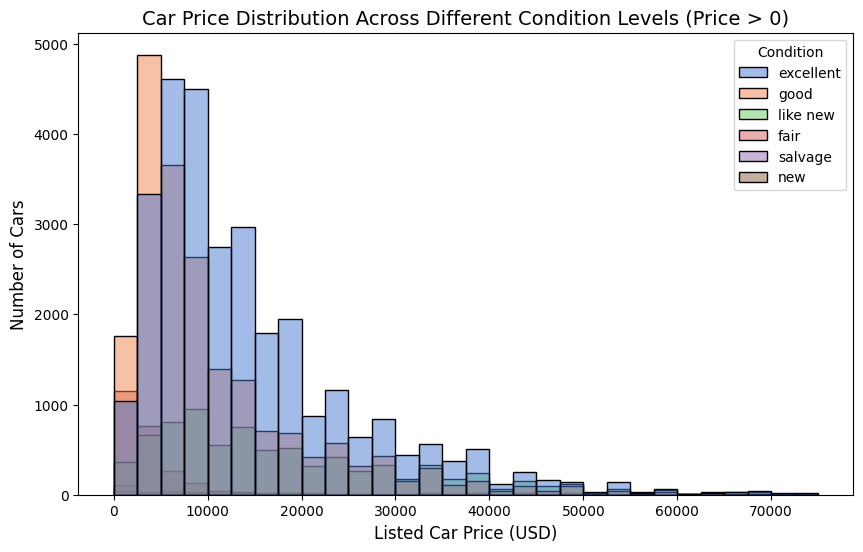

<ipython-input-66-84e0f061c945>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Condition', y='Listed_Price', palette='muted')


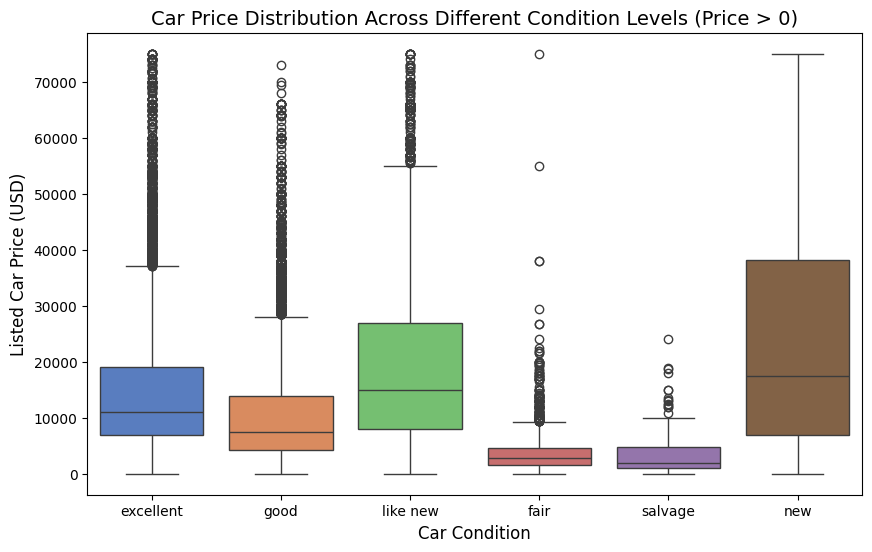

Condition vs Price Statistics:
   Condition  Total_Cars  Min_Price  Max_Price  Average_Price
0  excellent       29387          1      75000   14657.577092
1       fair        2404          1      75000    3808.671797
2       good       19826          1      72900   10852.598003
3   like new        8028          1      75000   19028.721599
4        new         349          1      74871   23093.401146
5    salvage         181          1      23985    3623.740331


In [66]:
# Filter data where Listed_Price > 0
filtered_data = US_Car_Dealership_Market_Data[US_Car_Dealership_Market_Data['Listed_Price'] > 0]

# Histplot: Car Price Distribution Across Different Condition Levels (Not Stacked)
plt.figure(figsize=(10,6))
sns.histplot(data=filtered_data, x='Listed_Price', hue='Condition', bins=30, palette='muted')
plt.title('Car Price Distribution Across Different Condition Levels (Price > 0)', fontsize=14)
plt.xlabel('Listed Car Price (USD)', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)
plt.show()

# Boxplot: Car Price Distribution Across Different Condition Levels
plt.figure(figsize=(10,6))
sns.boxplot(data=filtered_data, x='Condition', y='Listed_Price', palette='muted')
plt.title('Car Price Distribution Across Different Condition Levels (Price > 0)', fontsize=14)
plt.xlabel('Car Condition', fontsize=12)
plt.ylabel('Listed Car Price (USD)', fontsize=12)
plt.show()

# Statistics: Condition vs Price
condition_price_stats = filtered_data.groupby('Condition')['Listed_Price'].agg(
    Total_Cars='count',
    Min_Price='min',
    Max_Price='max',
    Average_Price='mean'
).reset_index()

# Displaying the statistics
print("Condition vs Price Statistics:")
print(condition_price_stats)


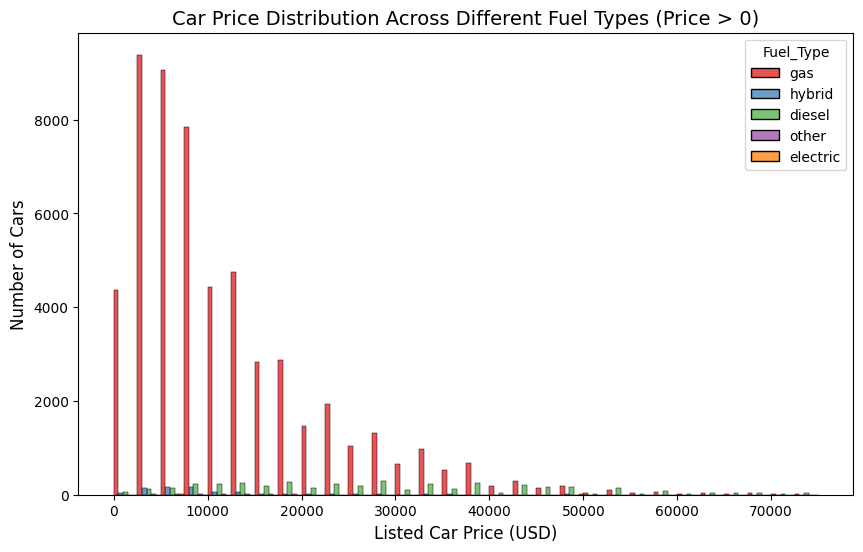

<ipython-input-67-a857bb87844d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Type', y='Listed_Price', data=filtered_data, palette='Set1')


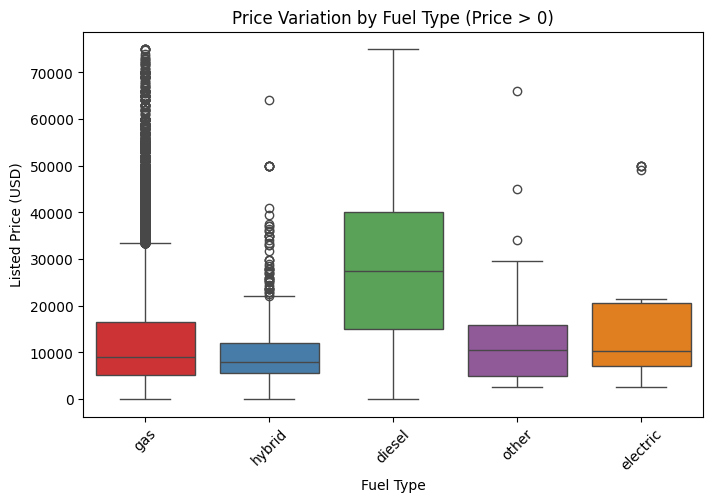

Fuel Type vs Price Statistics (Price > 0): 
  Fuel_Type  Total_Cars  Min_Price  Max_Price  Average_Price
0    diesel        4044          1      75000   29012.952522
1  electric          26       2600      49995   17865.423077
2       gas       55296          1      75000   12482.941225
3    hybrid         737          1      64000   10300.356852
4     other          72       2650      65988   12485.861111


In [67]:
# Filter data where Listed_Price > 0
filtered_data = US_Car_Dealership_Market_Data[US_Car_Dealership_Market_Data['Listed_Price'] > 0]

# Histplot: Car Price Distribution by Fuel Type (Price > 0)
plt.figure(figsize=(10, 6))

sns.histplot(data=filtered_data, x='Listed_Price', hue='Fuel_Type', multiple='dodge', bins=30, palette='Set1')

plt.title('Car Price Distribution Across Different Fuel Types (Price > 0)', fontsize=14)
plt.xlabel('Listed Car Price (USD)', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)

plt.show()

print()

# Boxplot: Price Variation by Fuel Type (Price > 0)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fuel_Type', y='Listed_Price', data=filtered_data, palette='Set1')
plt.title('Price Variation by Fuel Type (Price > 0)')
plt.xlabel('Fuel Type')
plt.ylabel('Listed Price (USD)')
plt.xticks(rotation=45)
plt.show()

# Fuel Type vs Price Statistics (Price > 0)
fuel_type_price_stats = filtered_data.groupby('Fuel_Type')['Listed_Price'].agg(
    Total_Cars='count',
    Min_Price='min',
    Max_Price='max',
    Average_Price='mean'
).reset_index()

# Displaying the result
print("Fuel Type vs Price Statistics (Price > 0): ")
print(fuel_type_price_stats)


# TASK-5 Price Affecting Features

Multivariate Analysis
Car price with selected feature

In [68]:
from sklearn.preprocessing import LabelEncoder


# Feature Encoding
# Initialize the LabelEncoder
le = LabelEncoder()


# Encoding Transmission & Drive
US_Car_Dealership_Market_Data['Transmission_Encoded'] = le.fit_transform(US_Car_Dealership_Market_Data['Transmission'].astype(str))
US_Car_Dealership_Market_Data['Drive_Encoded'] = le.fit_transform(US_Car_Dealership_Market_Data['Drive'].astype(str))
US_Car_Dealership_Market_Data['Fuel_Type_Encoded'] = le.fit_transform(US_Car_Dealership_Market_Data['Fuel_Type'])



# Manual Mapping for Title_Status
title_mapping = {
    'missing': 0,
    'lien': 1,
    'clean': 2,
    'parts only': 3,
    'rebuilt': 4,
    'salvage': 5
}
US_Car_Dealership_Market_Data['Title_Status_Encoded'] = US_Car_Dealership_Market_Data['Title_Status'].map(title_mapping)

# Manual Mapping for Size
size_mapping = {
    'compact': 1,
    'full-size': 2,
    'mid-size': 3,
    'sub-compact': 4
}
US_Car_Dealership_Market_Data['Size_N'] = US_Car_Dealership_Market_Data['Size'].replace(size_mapping).fillna(0).astype(int)

# Manual Mapping for Condition
condition_mapping = {
    'excellent': 5,
    'like new': 4,
    'new': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0
}
US_Car_Dealership_Market_Data['Condition_N'] = US_Car_Dealership_Market_Data['Condition'].replace(condition_mapping).fillna(0).astype(int)

# Checking the encoded columns
print(US_Car_Dealership_Market_Data[['Transmission', 'Drive', 'Title_Status',
                                     'Transmission_Encoded', 'Drive_Encoded', 'Title_Status_Encoded',
                                     'Size', 'Size_N', 'Condition', 'Condition_N',"Fuel_Type_Encoded"]].head(10))


  Transmission Drive Title_Status  Transmission_Encoded  Drive_Encoded  \
0    automatic   rwd        clean                     0              2   
1    automatic   rwd        clean                     0              2   
2    automatic   4wd        clean                     0              0   
3    automatic   fwd        clean                     0              1   
4    automatic   4wd        clean                     0              0   
5    automatic   rwd        clean                     0              2   
6    automatic   rwd        clean                     0              2   
7    automatic   4wd        clean                     0              0   
8    automatic   4wd      rebuilt                     0              0   
9    automatic   fwd        clean                     0              1   

   Title_Status_Encoded       Size  Size_N  Condition  Condition_N  \
0                     2   mid-size       3  excellent            5   
1                     2  full-size       2   

<ipython-input-68-090323fe5225>:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  US_Car_Dealership_Market_Data['Size_N'] = US_Car_Dealership_Market_Data['Size'].replace(size_mapping).fillna(0).astype(int)
<ipython-input-68-090323fe5225>:45: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  US_Car_Dealership_Market_Data['Condition_N'] = US_Car_Dealership_Market_Data['Condition'].replace(condition_mapping).fillna(0).astype(int)


<ipython-input-69-dc2ac39113d9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  US_Car_Dealership_Market_Data['Cylinders'].fillna(median_cylinders, inplace=True)


Missing values after replacement: 0


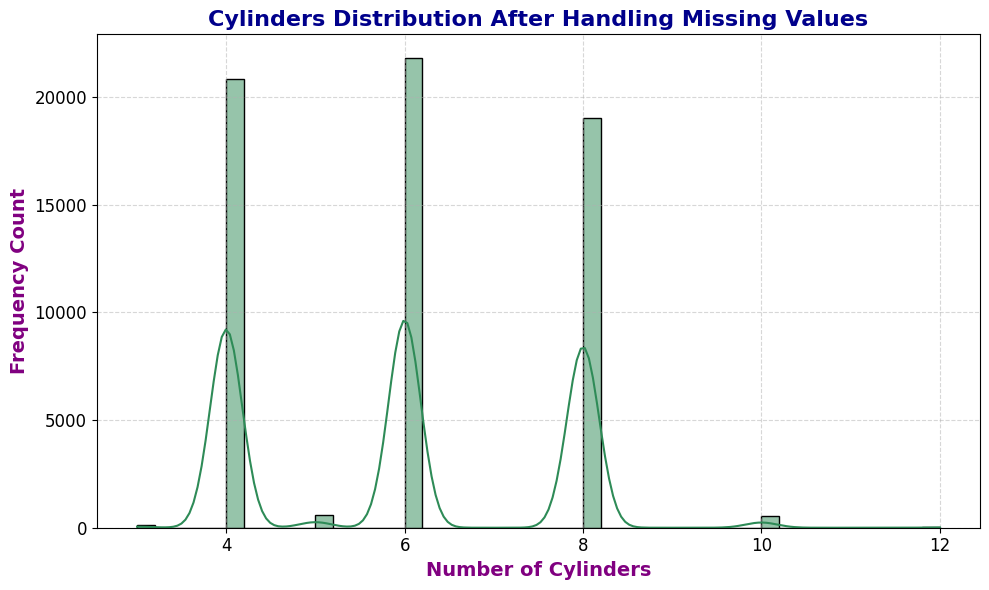

In [69]:
# Replace missing values with the median of the 'Cylinders' column
median_cylinders = US_Car_Dealership_Market_Data['Cylinders'].median()
US_Car_Dealership_Market_Data['Cylinders'].fillna(median_cylinders, inplace=True)

missing_values = US_Car_Dealership_Market_Data['Cylinders'].isnull().sum()
print(f"Missing values after replacement: {missing_values}")

plt.figure(figsize=(10, 6))
sns.histplot(US_Car_Dealership_Market_Data['Cylinders'], kde=True, color='#2E8B57', edgecolor='black')

plt.title('Cylinders Distribution After Handling Missing Values', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Number of Cylinders', fontsize=14, fontweight='bold', color='purple')
plt.ylabel('Frequency Count', fontsize=14, fontweight='bold', color='purple')

plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()






In [70]:
# Filter data where Listed_Price > 0
filtered_data = US_Car_Dealership_Market_Data[US_Car_Dealership_Market_Data['Listed_Price'] > 0]

# Group by multiple features and calculate statistics
price_stats = filtered_data.groupby(
    ['Transmission_Encoded', 'Drive_Encoded', 'Cylinders', 'Title_Status_Encoded']
).agg(
    Total_Cars=('Listed_Price', 'count'),
    Min_Price=('Listed_Price', 'min'),
    Max_Price=('Listed_Price', 'max'),
    Avg_Price=('Listed_Price', 'mean')
).reset_index()

# Display the result
print(price_stats)


     Transmission_Encoded  Drive_Encoded  Cylinders  Title_Status_Encoded  \
0                       0              0        3.0                     2   
1                       0              0        4.0                     1   
2                       0              0        4.0                     2   
3                       0              0        4.0                     3   
4                       0              0        4.0                     4   
..                    ...            ...        ...                   ...   
135                     1              2        8.0                     3   
136                     1              2        8.0                     4   
137                     1              2        8.0                     5   
138                     1              2       10.0                     2   
139                     1              2       10.0                     5   

     Total_Cars  Min_Price  Max_Price     Avg_Price  
0            14      

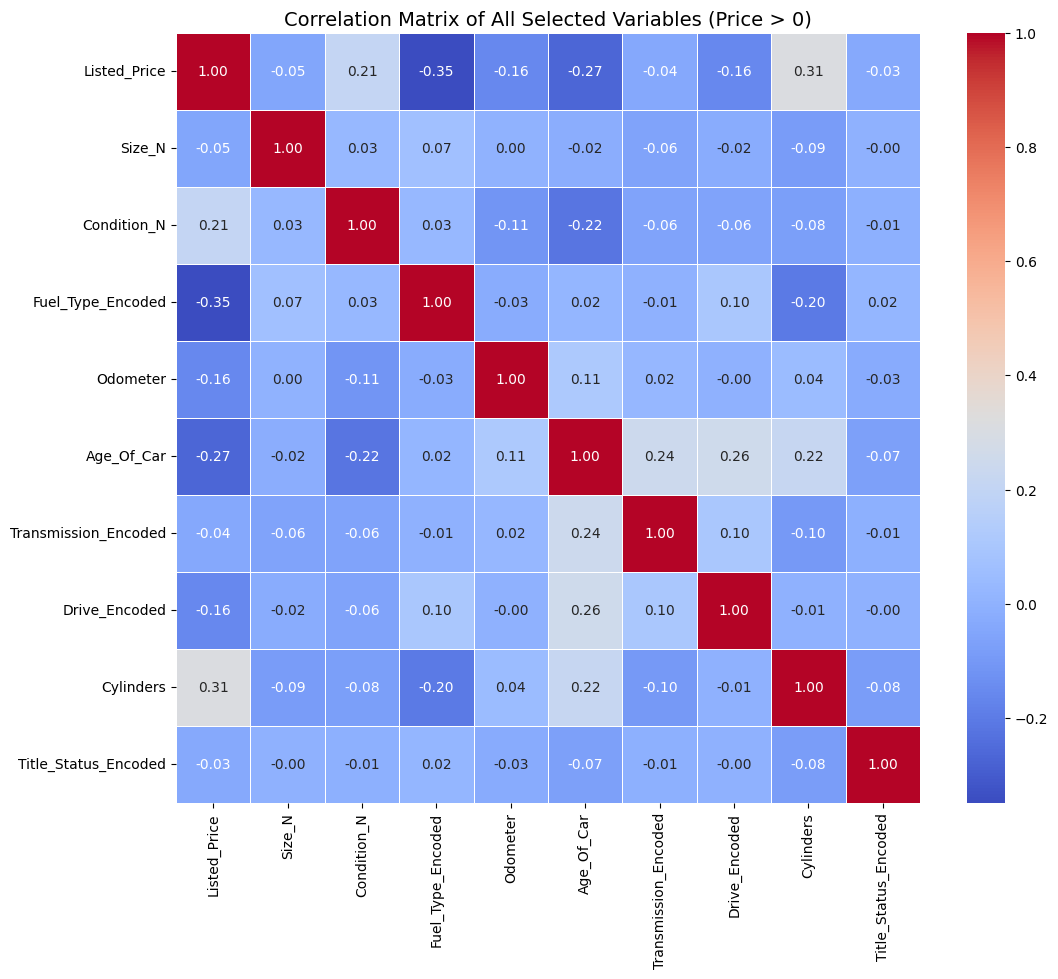

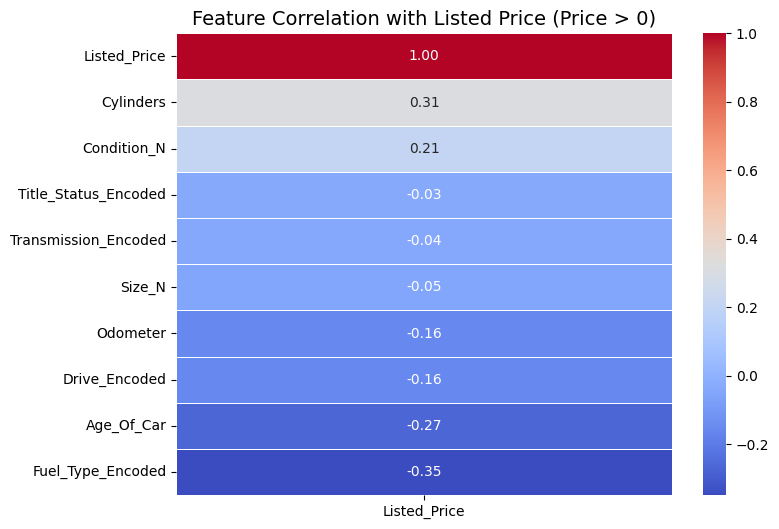

In [71]:
# Filter data where Listed_Price > 0
filtered_data = US_Car_Dealership_Market_Data[US_Car_Dealership_Market_Data['Listed_Price'] > 0]

# Select relevant features after filtering
combined_features = [
    'Listed_Price',
    'Size_N',
    'Condition_N',
    'Fuel_Type_Encoded',
    'Odometer',
    'Age_Of_Car',
    'Transmission_Encoded',
    'Drive_Encoded',
    'Cylinders',
    'Title_Status_Encoded'
]

# Calculate correlation matrix after filtering data
combined_corr_matrix = filtered_data[combined_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(combined_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of All Selected Variables (Price > 0)', fontsize=14)
plt.show()
print()

# Heatmap with only Listed_Price Correlation
plt.figure(figsize=(8,6))
sns.heatmap(combined_corr_matrix[['Listed_Price']].sort_values(by='Listed_Price', ascending=False),
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation with Listed Price (Price > 0)', fontsize=14)
plt.show()


# PERFORMANCE EVALUATION

In [72]:
# Filter the dataset to include only rows where Listed_Price is greater than 0
filtered_data = US_Car_Dealership_Market_Data[US_Car_Dealership_Market_Data['Listed_Price'] > 0]

# Inspect the filtered data
print(filtered_data.head())


   Listed_Price               Listed_Date       Make           Model  Year  \
0         13987 2021-04-24 14:23:15+00:00  chevrolet  silverado 1500  2007   
1          2800 2021-04-16 02:07:43+00:00     toyota         4runner  1999   
2          1750 2021-05-02 19:02:12+00:00       ford  escape xlt awd  2003   
3          9200 2021-04-12 16:20:38+00:00      dodge         journey  2015   
4          9900 2021-04-30 17:36:13+00:00     toyota        rav4 awd  2010   

  Vehicle_Type       Size   Color Transmission Fuel_Type  ... Title_Status  \
0        truck   mid-size     red    automatic       gas  ...        clean   
1          SUV  full-size  silver    automatic       gas  ...        clean   
2          SUV   mid-size    grey    automatic       gas  ...        clean   
3          SUV  full-size   white    automatic       gas  ...        clean   
4          SUV   mid-size    grey    automatic       gas  ...        clean   

   State                Region Age_Of_Car Transmission_Encoded

In [73]:
# Select features
features = ['Cylinders', 'Condition_N', 'Drive_Encoded', 'Age_Of_Car', 'Fuel_Type_Encoded', 'Odometer']
X = US_Car_Dealership_Market_Data[features]
y = US_Car_Dealership_Market_Data['Listed_Price']


In [74]:
from sklearn.model_selection import train_test_split

# Split dataset into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

# Inspect the split datasets
print("Training dataset size:", X_train.shape)
print("Test dataset size:", X_test.shape)


Training dataset size: (50356, 6)
Test dataset size: (12590, 6)


In [75]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
regressor = LinearRegression()

# Train the model with the training data
regressor.fit(X_train, y_train)

# Get the model's intercept and coefficients
print(f"Intercept: {regressor.intercept_:.2f}")
print(f"Coefficients: {regressor.coef_}")


Intercept: 12118.46
Coefficients: [ 2.13027889e+03  1.13049396e+03 -8.12871228e+02 -2.78489854e+02
 -5.97238151e+03 -5.76562214e-03]


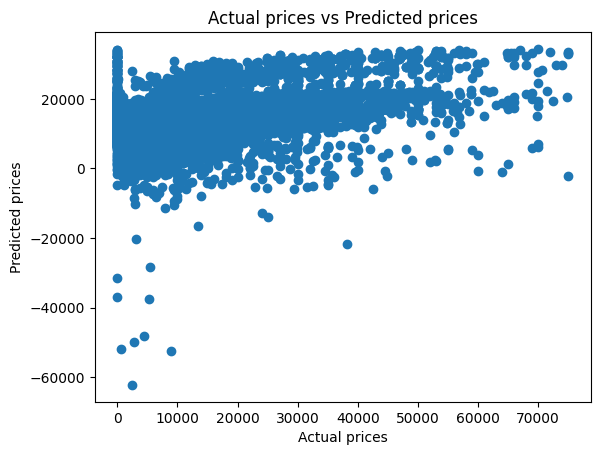

In [76]:
# Make predictions for the test dataset
y_pred = regressor.predict(X_test)

# Scatter plot for actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()


In [77]:
# Set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.0f' % x)

# Select 'Age_Of_Car' as an example feature
feature = X_test['Age_Of_Car']

# Create inspection DataFrame with actual, predicted prices and the chosen feature
inspection = pd.DataFrame({
    'Age of the car': feature,  # Selected feature, e.g., Age_Of_Car
    'Actual': y_test,    # Actual prices
    'Predicted': y_pred  # Predicted prices
})

# Display the first 20 rows of the inspection DataFrame
print(inspection.head(20))


       Age of the car  Actual  Predicted
60915               8    4950       7266
33620              16    8000      16914
10961              10   10995      14312
14471              14    3800       8688
39289               8    9599      14955
29750              50   39900       6183
37910              20    9250      10409
19117              19   15000       5377
62500              10   11950      10727
52903               9    4350       6726
18968               2   18995      12490
59591               1       1      21384
58653               9    6800      11380
30021              11   12999       5458
36432               8   17500      15048
39379              19    8200       9233
29749              12    8700      13450
50654               9    8000      10364
5011                8   13995      15811
42058              12   12995      15204


In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.0f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.0f}")

from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")



Mean Absolute Error (MAE): 7105
Root Mean Squared Error (RMSE): 10011
R-squared: 0.27


In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure all data in X is numeric
X_vif = X.copy()
X_vif['intercept'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["variables"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Print VIFs
for index, row in vif_data.iterrows():
    print(f'{row["variables"]}: {row["VIF"]:.2f}')  # VIF should be less than 5


Cylinders: 1.10
Condition_N: 1.06
Drive_Encoded: 1.08
Age_Of_Car: 1.18
Fuel_Type_Encoded: 1.06
Odometer: 1.01
intercept: 43.12


In [80]:
from scipy import stats

# Calculate the standard error of the prediction
std_error = np.sqrt(np.mean((y_pred - y_test)**2))

# Calculate the critical value for a 95% confidence interval
z_critical = stats.norm.ppf(1 - 0.05 / 2)

# Calculate the upper and lower bounds of the confidence interval
upper_bound = y_pred + z_critical * std_error
lower_bound = y_pred - z_critical * std_error

# Add upper and lower bounds to the inspection DataFrame
inspection['upper_bound'] = upper_bound
inspection['lower_bound'] = lower_bound

# Display the first 20 rows of the inspection DataFrame with CI
print(inspection.head(20))


       Age of the car  Actual  Predicted  upper_bound  lower_bound
60915               8    4950       7266        26887       -12355
33620              16    8000      16914        36535        -2708
10961              10   10995      14312        33934        -5309
14471              14    3800       8688        28309       -10933
39289               8    9599      14955        34576        -4666
29750              50   39900       6183        25804       -13438
37910              20    9250      10409        30030        -9213
19117              19   15000       5377        24998       -14244
62500              10   11950      10727        30348        -8894
52903               9    4350       6726        26347       -12896
18968               2   18995      12490        32111        -7132
59591               1       1      21384        41006         1763
58653               9    6800      11380        31001        -8241
30021              11   12999       5458        25079       -1

In [81]:
from sklearn.linear_model import Lasso

# Create a Lasso model
lasso = Lasso(alpha=1.0)

# Fit the model using the training data
lasso.fit(X_train, y_train)

# Get the coefficients of the features
coefficients = lasso.coef_

# Print the features and their coefficients
for feature, coef in zip(features, coefficients):
    print(f'{feature}: {coef}')


Cylinders: 2130.1403836874074
Condition_N: 1129.9892384885943
Drive_Encoded: -811.4104441603731
Age_Of_Car: -278.52364397649234
Fuel_Type_Encoded: -5969.030997487644
Odometer: -0.005765368364603755


#Additonal Insights

<ipython-input-10-716b69288e34>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.index, y=top_regions.values, palette='Set2')


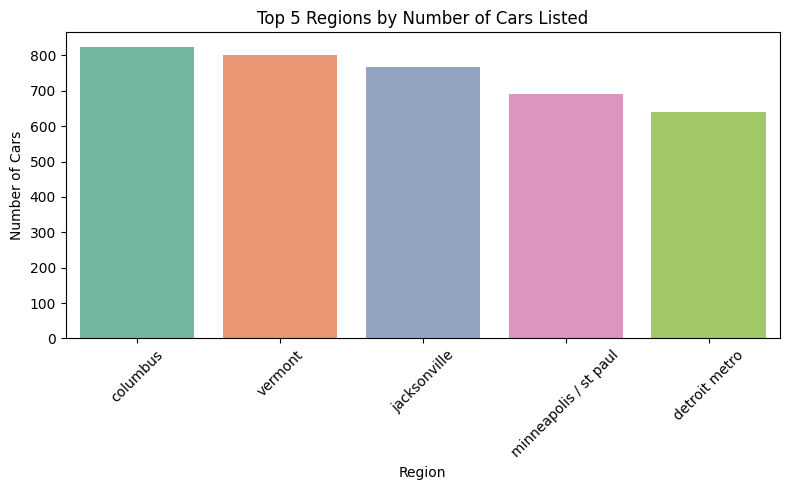

In [10]:
# Top 5 Regions by number of cars listed
top_regions = US_Car_Dealership_Market_Data['Region'].value_counts().head(5)

# Plotting Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(x=top_regions.index, y=top_regions.values, palette='Set2')

plt.title('Top 5 Regions by Number of Cars Listed')
plt.xlabel('Region')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-82-784123b951f6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_colors.index, y=top_colors.values, palette='Set2')


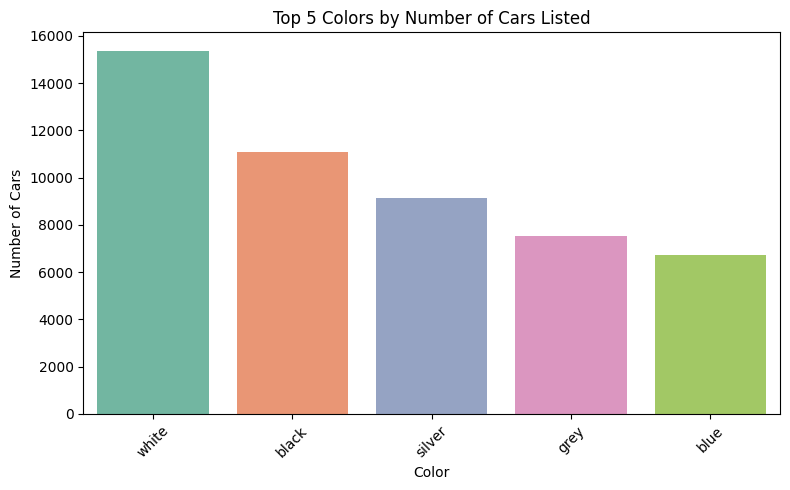

In [82]:

# Top 5 Colors by number of cars listed
top_colors = US_Car_Dealership_Market_Data['Color'].value_counts().head(5)

# Plotting Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(x=top_colors.index, y=top_colors.values, palette='Set2')

plt.title('Top 5 Colors by Number of Cars Listed')
plt.xlabel('Color')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
